In [1]:
### Importing the usefull libraries:-

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pf
from sklearn import metrics
from sklearn.model_selection import train_test_split
import plotly
from plotly.offline import plot,init_notebook_mode,iplot
import plotly.graph_objs as go
import os
import warnings
warnings.filterwarnings("ignore")

import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
from scipy import special

py.offline.init_notebook_mode(connected=True)

%matplotlib inline
plt.rcParams["figure.figsize"]=(7,5)
plt.rcParams["axes.grid"]=True
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\ProgramDa

In [2]:
os.chdir("F:\ML_Projects\Maruti")

In [15]:
train=pd.read_csv("F:\\ML_Projects\\Maruti\\New maruti data 1_month\\EVDATA358272088709954_2018-11-16_2018-11-17.csv")
train.head(3)

TIMESTAMP  longitude   latitude  EVMGS  EVICO_Max  \
0  2018-11-16T07:07:24.415+05:30  77.257108  28.558857  16384        255   
1  2018-11-16T07:07:24.515+05:30  77.257108  28.558857  16384        255   
2  2018-11-16T07:07:24.615+05:30  77.257108  28.558857  16384        255   

   EVMGT  EVBMI_Min  EVSMA_MIN  EVSMA_MAX  EVMGR  ...    EVHTP_AVG  EVBOA_MIN  \
0  819.0       61.5       72.7       72.7  409.8  ...            0      227.0   
1  819.0       61.5       72.7       72.7  409.8  ...            0      227.0   
2  819.0       61.5       72.7       72.7  409.8  ...            0      227.0   

   EVODO  EVGPO  EVTRQ  EVIGC             IMEI  EVBOA_AVG  EVBFN  EVCFN  
0    906     10  819.2     30  358272088709954     512.25      0      0  
1    906     10  819.2     30  358272088709954     512.25      0      0  
2    906     10  819.2     30  358272088709954     512.25      0      0  

[3 rows x 106 columns]

In [16]:
print('Shape of train data ', train.shape)

Shape of train data  (20000, 106)


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 106 entries, TIMESTAMP to EVCFN
dtypes: float64(38), int64(64), object(4)
memory usage: 16.2+ MB


In [18]:
# Seperating the Numerical and Catagorical columns
num_columns=train.select_dtypes(include=np.number)#.columns
cat_columns=train.select_dtypes(include=np.object)#.columns
print("num_col shape:",num_columns.shape,",","cat_col shape:", cat_columns.shape,)
cat_columns.columns

num_col shape: (20000, 102) , cat_col shape: (20000, 4)


Index(['TIMESTAMP', 'EVTmg', 'EVVer', 'trip_id'], dtype='object')

In [19]:
train.trip_id.value_counts()
train.EVVer.value_counts()
train.EVTmg.value_counts()
train.TIMESTAMP.value_counts()

train.drop(['EVTmg', 'EVVer', 'trip_id'],axis=1,inplace=True)

# All the catagorical columns except TIMESTAMP have a one unique value so we need to delete all unique vlaue columns 
# from catagorical datatype.

In [20]:
### 2.Data Audit report:-
def var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.isnull().mean(),x.mean(),x.median(),x.var(),x.std(),x.min(),
                      x.dropna().quantile(0.01),x.dropna().quantile(0.05),x.dropna().quantile(0.10),
                     x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),
                     x.dropna().quantile(0.90),x.dropna().quantile(0.95),x.dropna().quantile(0.99),x.max()],
                    index=["N","NMISS","PCT","MEAN","MEDIAN","VAR","STD","MIN","P01","P05","P10","P25","P50","P75","P90","P95","P99","MAX"])


summary_rep = pd.DataFrame(num_columns.apply(var_summary))
summary_rep

longitude      latitude         EVMGS     EVICO_Max         EVMGT  \
N       20000.000000  20000.000000  2.000000e+04  20000.000000  20000.000000   
NMISS       0.000000      0.000000  0.000000e+00      0.000000      0.000000   
PCT         0.000000      0.000000  0.000000e+00      0.000000      0.000000   
MEAN       77.184660     28.551316  1.925722e+04     75.564500    833.280200   
MEDIAN     77.175281     28.552468  1.965100e+04     72.000000    828.850000   
VAR         0.003064      0.000272  2.921006e+06    544.178049    685.627459   
STD         0.055350      0.016486  1.709095e+03     23.327624     26.184489   
MIN        77.090990     28.500480  1.613000e+04      0.000000    766.800000   
P01        77.093097     28.503194  1.638300e+04     70.000000    802.100000   
P05        77.095190     28.516525  1.638400e+04     70.000000    803.000000   
P10        77.106555     28.532815  1.641190e+04     71.000000    803.100000   
P25        77.134249     28.542718  1.780375e+04     72.000000    815.675000   
P50        77.175281     28.552468  1.965100e+04     72.000000    828.850000   
P75        77.247907     28.560914  2.055525e+04     74.000000    847.300000   
P90        77.253900     28.574046  2.122010e+04     74.000000    869.410000   
P95        77.257108     28.575178  2.159130e+04     74.000000    884.700000   
P99        77.257108     28.575819  2.253821e+04    255.000000    911.541000   
MAX        77.257108     28.575839  2.349200e+04    255.000000    964.100000   

        EVBMI_Min     EVSMA_MIN     EVSMA_MAX         EVMGR  EVHTP_Min  \
N         20000.0  20000.000000  20000.000000  20000.000000    20000.0   
NMISS         0.0      0.000000      0.000000      0.000000        0.0   
PCT           0.0      0.000000      0.000000      0.000000        0.0   
MEAN         61.5     64.181000     64.218000    278.559400        0.0   
MEDIAN       61.5     63.100000     63.100000    278.600000        0.0   
VAR           0.0     33.348806     33.117732   2223.750219        0.0   
STD           0.0      5.774843      5.754801     47.156656        0.0   
MIN          61.5     53.300000     53.400000    229.000000        0.0   
P01          61.5     54.092000     54.192000    229.000000        0.0   
P05          61.5     55.000000     55.100000    229.200000        0.0   
P10          61.5     56.780000     56.790000    229.400000        0.0   
P25          61.5     59.800000     59.825000    229.800000        0.0   
P50          61.5     63.100000     63.100000    278.600000        0.0   
P75          61.5     69.800000     69.800000    306.800000        0.0   
P90          61.5     72.300000     72.400000    325.620000        0.0   
P95          61.5     72.400000     72.400000    410.000000        0.0   
P99          61.5     72.700000     72.700000    410.000000        0.0   
MAX          61.5     72.700000     72.700000    410.000000        0.0   

         ...     EVHTP_AVG     EVBOA_MIN         EVODO         EVGPO  \
N        ...       20000.0  20000.000000  20000.000000  20000.000000   
NMISS    ...           0.0      0.000000      0.000000      0.000000   
PCT      ...           0.0      0.000000      0.000000      0.000000   
MEAN     ...           0.0    524.081875    915.850000     10.867000   
MEDIAN   ...           0.0    516.750000    916.000000     11.000000   
VAR      ...           0.0   3099.060593     55.150258      0.267324   
STD      ...           0.0     55.669207      7.426322      0.517034   
MIN      ...           0.0    167.000000    906.000000      8.000000   
P01      ...           0.0    223.000000    906.000000      9.000000   
P05      ...           0.0    484.000000    906.000000      9.000000   
P10      ...           0.0    490.000000    906.000000     11.000000   
P25      ...           0.0    505.750000    909.000000     11.000000   
P50      ...           0.0    516.750000    916.000000     11.000000   
P75      ...           0.0    542.250000    921.250000     11.000000   
P90

In [21]:
# Removing All duplicates Rows from dataset.
num_columns.drop_duplicates(inplace=True)
num_columns.reset_index(inplace=True)
#new_data.reset_index(inplace=True)#.drop .head()
num_columns.drop(["index"],axis=1,inplace=True)

print("new_data shape after removing duplicate: ",num_columns.shape)

new_data shape after removing duplicate:  (2000, 102)


In [22]:
num_columns.head(2)

longitude   latitude  EVMGS  EVICO_Max  EVMGT  EVBMI_Min  EVSMA_MIN  \
0  77.257108  28.558857  16384        255  819.0       61.5       72.7   
1  77.257108  28.558857  16384         70  819.1       61.5       72.7   

   EVSMA_MAX  EVMGR  EVHTP_Min  ...    EVHTP_AVG  EVBOA_MIN  EVODO  EVGPO  \
0       72.7  409.8          0  ...            0      227.0    906     10   
1       72.7  409.8          0  ...            0      513.0    906     10   

   EVTRQ  EVIGC             IMEI  EVBOA_AVG  EVBFN  EVCFN  
0  819.2     30  358272088709954     512.25      0      0  
1  819.2     30  358272088709954     513.00      0      0  

[2 rows x 102 columns]

In [23]:
# Here we are taking the sum of every 10 Timestamp variable. Because after every 10 value there is only one unique value
# in other columns.
time=[]
for i in range(len(train)):
    if i%10==0:
        time.append(train["TIMESTAMP"][i])
    else:
        continue

time=pd.DataFrame(pd.to_datetime(time))
time.columns=["TIMESTAMP"]
time.head()


TIMESTAMP
0 2018-11-16 01:37:24.415
1 2018-11-16 01:37:25.415
2 2018-11-16 01:37:26.415
3 2018-11-16 01:37:27.415
4 2018-11-16 01:37:28.415

In [24]:
#time["TIMESTAMP"][2]-time["TIMESTAMP"][0]
new_data=pd.concat([time,num_columns],axis=1)


# creating the Target Variable
new_data["Target_distance"]=new_data["EVVSP"]*0.000278
new_data["Target_distance"].value_counts().count()
new_data.head()


TIMESTAMP  longitude   latitude  EVMGS  EVICO_Max  EVMGT  \
0 2018-11-16 01:37:24.415  77.257108  28.558857  16384        255  819.0   
1 2018-11-16 01:37:25.415  77.257108  28.558857  16384         70  819.1   
2 2018-11-16 01:37:26.415  77.257108  28.558857  16384         70  819.1   
3 2018-11-16 01:37:27.415  77.257108  28.558857  16384         70  819.1   
4 2018-11-16 01:37:28.415  77.257108  28.558857  16383         70  813.9   

   EVBMI_Min  EVSMA_MIN  EVSMA_MAX  EVMGR       ...         EVBOA_MIN  EVODO  \
0       61.5       72.7       72.7  409.8       ...            227.00    906   
1       61.5       72.7       72.7  409.8       ...            513.00    906   
2       61.5       72.7       72.7  409.8       ...            513.00    906   
3       61.5       72.7       72.7  409.8       ...            513.00    906   
4       61.5       72.7       72.7  230.0       ...            513.25    906   

   EVGPO  EVTRQ  EVIGC             IMEI  EVBOA_AVG  EVBFN  EVCFN  \
0     10  819.2     30  358272088709954     512.25      0      0   
1     10  819.2     30  358272088709954     513.00      0      0   
2     10  819.2     30  358272088709954     513.00      0      0   
3     10  819.2     30  358272088709954     513.00      0      0   
4      8  812.9     30  358272088709954     513.25      0      0   

   Target_distance  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

[5 rows x 104 columns]

In [25]:
#pd.DataFrame
#new_data["Target_distance"].apply(var_summary)
new_data.shape

(2000, 104)

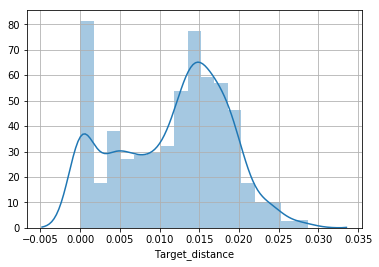

In [26]:
#new_data.Target_distance.value_counts()
# Checking the distribution of Target Variable
sns.distplot(new_data.Target_distance)
plt.rcParams["figure.figsize"]=(7,5)
plt.rcParams["axes.grid"]=True
plt.show()

In [14]:
target_var_summary=pd.DataFrame(new_data["Target_distance"])
target_var_summary.apply(var_summary)

Target_distance
N           2000.000000
NMISS          0.000000
PCT            0.000000
MEAN           0.011621
MEDIAN         0.013206
VAR            0.000048
STD            0.006903
MIN            0.000000
P01            0.000000
P05            0.000000
P10            0.000154
P25            0.005706
P50            0.013206
P75            0.016834
P90            0.019535
P95            0.021071
P99            0.025157
MAX            0.028725

### Here in Target variable 10% values are null means vehicle not running at these point. so we will create another model for 0 values in target variable.

In [27]:
new_data=new_data[new_data["Target_distance"]!=0].reset_index(drop=True)
time_col=pd.DataFrame(new_data["TIMESTAMP"])
new_data_EV=new_data
new_data.drop(['TIMESTAMP'],axis=1,inplace=True)

new_data.head(3)
#time_col.head()

longitude   latitude  EVMGS  EVICO_Max  EVMGT  EVBMI_Min  EVSMA_MIN  \
0  77.257108  28.558857  16319         70  808.9       61.5       72.7   
1  77.257108  28.558857  16300         70  766.8       61.5       72.7   
2  77.257108  28.558857  16235         70  810.1       61.5       72.7   

   EVSMA_MAX  EVMGR  EVHTP_Min       ...         EVBOA_MIN  EVODO  EVGPO  \
0       72.7  230.0          0       ...            513.75    906      8   
1       72.7  230.0          0       ...            517.75    906      8   
2       72.7  230.2          0       ...            514.00    906      8   

   EVTRQ  EVIGC             IMEI  EVBOA_AVG  EVBFN  EVCFN  Target_distance  
0  812.2     30  358272088709954     513.75      0      0         0.000376  
1  768.2     30  358272088709954     517.75      0      0         0.000211  
2  811.2     30  358272088709954     515.25      0      0         0.000645  

[3 rows x 103 columns]

In [28]:
new_data.shape,time_col.shape

((1806, 103), (1806, 1))

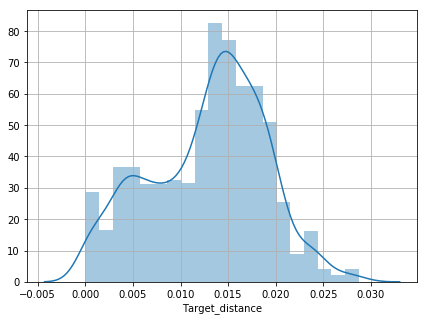

In [29]:
# Checking the distribution after removing the 0 values from target variable.
sns.distplot(new_data.Target_distance)

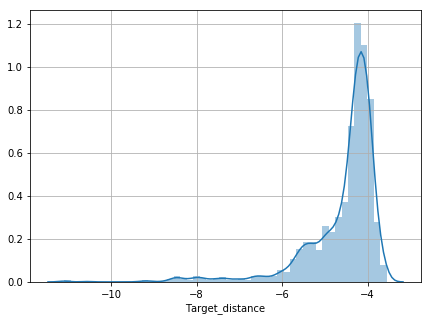

In [30]:
# Doing the Log Transformation of Target Variable after removing O values.
sns.distplot(np.log(new_data.Target_distance))

In [31]:
new_data.shape

(1806, 103)

In [32]:
# Dimensionality Reduction
from statsmodels.stats.outliers_influence import variance_inflation_factor
#import warnings
#warnings.filterwarnings("ignore")

def calculate_vif_(X):
    variables = list(X.columns)
    vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(X.columns))}
    return vif

vif=calculate_vif_(new_data)
vif

{'EVACE': 12.579648506858366,
 'EVACO_X': 2.5175310073794983,
 'EVACO_Y': 1.3284849962425398,
 'EVACO_Z': 1.1165154559088757,
 'EVACP': 21.61500874122023,
 'EVACS': 28.263512402595524,
 'EVBAP_Latest': nan,
 'EVBAP_Max': nan,
 'EVBAP_Min': nan,
 'EVBBV': 2.7820140669762137,
 'EVBCA': nan,
 'EVBFN': nan,
 'EVBMA_Latest': 10.62964013556787,
 'EVBMA_Max': 11.270360976131794,
 'EVBMA_Min': 0.0,
 'EVBMI_Latest': 18.517539224351637,
 'EVBMI_Max': 20.72378475016746,
 'EVBMI_Min': 0.0,
 'EVBOA_AVG': 54.24223269756878,
 'EVBOA_MAX': 6.646081307116777,
 'EVBOA_MIN': 23.848604152841034,
 'EVBOV_AVG': 224.05235307698436,
 'EVBOV_MAX': 6.213271854510128,
 'EVBOV_MIN': 59487.89324346917,
 'EVBRP': nan,
 'EVCCS': nan,
 'EVCFN': nan,
 'EVCLC': nan,
 'EVCOM_Latest': 14.603820416744334,
 'EVCOM_Max': 4.003220561011316,
 'EVCOM_Min': 236970.787528276,
 'EVCRP': 0.0,
 'EVCST': 0.0,
 'EVDDC': 0.0022380263730217447,
 'EVDI1': 17.738681218952593,
 'EVDI2': 30.018558415211565,
 'EVDIT': 5.58114984162525,
 'EV

### Droping the Variable having VIF>10 because these variables are highly correlated.

In [34]:
# Removing the variable which has VIF>10 because these variable are high correlated.
vif1={(k) for (k,v) in vif.items() if v>10 }
#type(vif1)
#vif1
vif01=new_data[['EVACE','EVACP','EVACS','EVBMA_Latest','EVBMA_Max','EVBMI_Latest','EVBMI_Max','EVBOA_AVG','EVBOA_MIN','EVBOV_AVG',
 'EVBOV_MIN','EVCOM_Latest','EVCOM_Min','EVDI1','EVDI2','EVDRG','EVICO_Max','EVICO_Min','EVIDC','EVIGM_Max','EVIGM_Min',
 'EVIND','EVIRT_Latest','EVIRT_Min','EVMCV_MAX','EVMCV_MIN','EVMGF','EVMGR','EVMGS','EVMGT','EVODO','EVSMA_MAX','EVSMA_MIN','EVSMI_MAX',
 'EVSMI_MIN','EVSOMA','EVSOMI','EVTRQ','longitude','EVVSP']]# EVVSP(Taken),EVICM

new_vif_col=new_data.drop(['EVACE','EVACP','EVACS','EVBMA_Latest','EVBMA_Max','EVBMI_Latest','EVBMI_Max','EVBOA_AVG','EVBOA_MIN','EVBOV_AVG',
 'EVBOV_MIN','EVCOM_Latest','EVCOM_Min','EVDI1','EVDI2','EVDRG','EVICO_Max','EVICO_Min','EVIDC','EVIGM_Max','EVIGM_Min',
 'EVIND','EVIRT_Latest','EVIRT_Min','EVMCV_MAX','EVMCV_MIN','EVMGF','EVMGR','EVMGS','EVMGT','EVODO','EVSMA_MAX','EVSMA_MIN','EVSMI_MAX',
 'EVSMI_MIN','EVSOMA','EVSOMI','EVTRQ','longitude','EVVSP'],axis=1)# EVVSP(Taken),EVICM
#new_vif_col.shape
print("new_data shape:",new_data.shape,",","new_vif_col shape: ", new_vif_col.shape)

new_data shape: (1806, 103) , new_vif_col shape:  (1806, 63)


In [35]:
new_vif_col.head()

latitude  EVBMI_Min  EVHTP_Min  EVBAP_Max  EVRER  EVHTP_Max  EVPWA_MIN  \
0  28.558857       61.5          0          0  16383          0          0   
1  28.558857       61.5          0          0  16383          0          0   
2  28.558857       61.5          0          0  16383          0          0   
3  28.558857       61.5          0          0  16383          0          0   
4  28.558857       61.5          0          0  16383          0          0   

   EVHVS  EVDSE  EVBBV       ...         hdop  EVVBT  EVHTR  EVHTP_AVG  EVGPO  \
0     10      0   47.0       ...          1.1    139      0          0      8   
1     10      0   61.0       ...          1.1    139      0          0      8   
2     10      0   55.0       ...          1.1    139      0          0      8   
3     10      0   51.5       ...          1.1    139      0          0      8   
4     10      0   49.0       ...          1.1    139      0          0      8   

   EVIGC             IMEI  EVBFN  EVCFN  Target_distance  
0     30  358272088709954      0      0         0.000376  
1     30  358272088709954      0      0         0.000211  
2     30  358272088709954      0      0         0.000645  
3     30  358272088709954      0      0         0.000015  
4     30  358272088709954      0      0         0.000111  

[5 rows x 63 columns]

In [36]:
col_rep=pf.ProfileReport(new_vif_col)
col_rep

### Dropping the column which has only 1 unique value  because it will create biasness in the model

In [37]:
# Columns having constant value 
unique_value_col=new_vif_col[['EVBMI_Min','EVHTP_Min','EVBAP_Max','EVRER','EVHTP_Max','EVPWA_MIN','EVHVS','EVDSE','EVBMA_Min','EVBAP_Min','EVBCA','EVDDC',
 'EVSOH','EVICR','EVPWA_MAX','EVCRP','EVIST','EVDRV','EVV12','EVRGT','EVBAP_Latest','EVMTR','EVOII','EVBRP','EVCLC','EVTRE',
 'EVCCS','EVCST','EVIGS','EVHTR','EVHTP_AVG','EVIGC','IMEI','EVBFN','EVCFN']]

#print(a2.shape)

new_data=new_vif_col.drop(['EVBMI_Min','EVHTP_Min','EVBAP_Max','EVRER','EVHTP_Max','EVPWA_MIN','EVHVS','EVDSE','EVBMA_Min','EVBAP_Min','EVBCA','EVDDC',
 'EVSOH','EVICR','EVPWA_MAX','EVCRP','EVIST','EVDRV','EVV12','EVRGT','EVBAP_Latest','EVMTR','EVOII','EVBRP','EVCLC','EVTRE',
 'EVCCS','EVCST','EVIGS','EVHTR','EVHTP_AVG','EVIGC','IMEI','EVBFN','EVCFN'],axis=1)
print("dropped_col :", unique_value_col.shape,"  new_data after dropped :", new_data.shape)

dropped_col : (1806, 35)   new_data after dropped : (1806, 28)


In [38]:
new_data.head()

latitude  EVBBV  EVGSM  numsat  EVIGM_Latest  EVICM  EVMSC  EVOAS  \
0  28.558857   47.0      0       9            70      8   10.0   57.5   
1  28.558857   61.0      0       9            77      8    0.0   57.5   
2  28.558857   55.0      0       9            72      8    8.7   57.5   
3  28.558857   51.5      0       9            72      8    0.0   57.5   
4  28.558857   49.0      0       9            72      8    3.9   57.5   

   EVACO_Y  EVACO_Z       ...         EVIRT_Max  EVDOV   EVPSS  EVDOA  \
0      968      -60       ...               120   13.9  35.650     19   
1      848     -100       ...               120   13.9  10.600     24   
2      882      -86       ...               120   13.9  34.575     18   
3      852      -96       ...               120   13.9  23.125     18   
4      888      -72       ...               120   13.9  30.800     17   

   EVBOV_MAX  EVCOM_Max  hdop  EVVBT  EVGPO  Target_distance  
0     255.50         69   1.1    139      8         0.000376  
1     255.25         69   1.1    139      8         0.000211  
2     255.50         69   1.1    139      8         0.000645  
3     255.50         69   1.1    139      8         0.000015  
4     255.50         69   1.1    139      8         0.000111  

[5 rows x 28 columns]

In [39]:
col_rep=pf.ProfileReport(new_data)
col_rep
# After dropping unique value column and highly correlated column finally there are only 28 columns. Which we take 
# for further analysis.

In [40]:
# Top 20 highly correlated var with target var:-

final_correlation = new_data.corr()
top20_correlated_columns=final_correlation.Target_distance.sort_values(ascending=False).head(20)
print(top20_correlated_columns)

### Correlation plot of top 20 highly correlated variable:-

top20_corr = new_data[['Target_distance', 'EVBBV',
        'EVCOM_Max','numsat','EVVBT','EVDIT','EVGPO','EVIGM_Latest', 'EVACO_Z',
        'EVICM','EVIRT_Max','EVACO_Y','EVIRP','EVBOA_MAX','EVDOV','EVACO_X','EVDR1','EVIRN','EVDR2','EVDOA']].corr()


plt.rcParams['figure.figsize'] = (10,7)
print(sns.heatmap(top20_corr,annot=True,cmap = "RdBu_r"))


Target_distance    1.000000
EVBBV              0.763661
EVCOM_Max          0.417230
numsat             0.364255
EVVBT              0.222789
EVDIT              0.195003
EVGPO              0.177919
EVIGM_Latest       0.121730
EVACO_Z            0.121132
EVICM              0.084741
EVIRT_Max          0.021894
EVACO_Y            0.005640
EVIRP              0.005424
EVBOA_MAX         -0.006077
EVDOV             -0.010878
EVACO_X           -0.016482
EVDR1             -0.016963
EVIRN             -0.029667
EVDR2             -0.039067
EVDOA             -0.063673
Name: Target_distance, dtype: float64
AxesSubplot(0.125,0.11;0.62x0.77)


### These are the Top 20 highly corr variable with Target colmn

In [41]:
#data=pd.concat([time_col,new_data],axis=1)
new_data.head(10)

latitude  EVBBV  EVGSM  numsat  EVIGM_Latest  EVICM  EVMSC  EVOAS  \
0  28.558857   47.0      0       9            70      8   10.0   57.5   
1  28.558857   61.0      0       9            77      8    0.0   57.5   
2  28.558857   55.0      0       9            72      8    8.7   57.5   
3  28.558857   51.5      0       9            72      8    0.0   57.5   
4  28.558857   49.0      0       9            72      8    3.9   57.5   
5  28.558857   57.5      0       9            72      8    0.5   57.5   
6  28.558857   58.5      0       9            72      8    0.0   57.5   
7  28.558857   57.5      0       9            71      8    0.0   57.5   
8  28.558857   57.5      0       9            73      8    0.0   57.5   
9  28.558857   57.5      0       9            72      8    0.0   57.5   

   EVACO_Y  EVACO_Z       ...         EVIRT_Max  EVDOV   EVPSS  EVDOA  \
0      968      -60       ...               120   13.9  35.650     19   
1      848     -100       ...               120   13.9  10.600     24   
2      882      -86       ...               120   13.9  34.575     18   
3      852      -96       ...               120   13.9  23.125     18   
4      888      -72       ...               120   13.9  30.800     17   
5      872      -72       ...               120   13.9  26.500     31   
6      940      100       ...               120   13.9  20.100     17   
7      839      -85       ...               120   13.9  10.525     20   
8      832      -64       ...               120   13.9  10.550     20   
9      858      -58       ...               120   13.9  11.125     37   

   EVBOV_MAX  EVCOM_Max  hdop  EVVBT  EVGPO  Target_distance  
0     255.50         69   1.1    139      8         0.000376  
1     255.25         69   1.1    139      8         0.000211  
2     255.50         69   1.1    139      8         0.000645  
3     255.50         69   1.1    139      8         0.000015  
4     255.50         69   1.1    139      8         0.000111  
5     255.50         69   1.1    139      8         0.000328  
6     255.50         69   1.1    139      8         0.000895  
7     255.50         69   1.1    139      8         0.000890  
8     255.25         69   1.1    139      8         0.001071  
9     255.25         69   1.1    139      8         0.000910  

[10 rows x 28 columns]

In [42]:
# Splitting into Train and Test data
X=new_data.drop(['Target_distance'],axis=1)
Y=new_data['Target_distance']

x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size = 0.3, random_state = 42)
print('shape of x_train:',x_train.shape,'shape of y_train:',y_train.shape, 'shape of x_test:',x_test.shape,'shape of y_test:',y_test.shape)


shape of x_train: (1264, 27) shape of y_train: (1264,) shape of x_test: (542, 27) shape of y_test: (542,)


##  Random Forest Feature Importance

In [43]:
# Random forest Regressor
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(random_state=0)
regressor.fit(x_train,y_train)

# Feature Importance
features_importance = pd.DataFrame({'Variables':x_train.columns,'Importance':regressor.feature_importances_}).sort_values(['Importance'], ascending = False)
print(features_importance.head(20))
features_importance1 = features_importance.head(20)



    Importance     Variables
1     0.606437         EVBBV
22    0.101483     EVBOV_MAX
0     0.085164      latitude
16    0.047962     EVBOA_MAX
23    0.026755     EVCOM_Max
20    0.023928         EVPSS
2     0.016374         EVGSM
4     0.013207  EVIGM_Latest
17    0.010267  EVICO_Latest
10    0.009909       EVACO_X
9     0.009766       EVACO_Z
7     0.009405         EVOAS
8     0.007550       EVACO_Y
15    0.007324         EVIRN
14    0.006603         EVIRP
21    0.003825         EVDOA
24    0.003304          hdop
3     0.003294        numsat
6     0.003050         EVMSC
25    0.002588         EVVBT


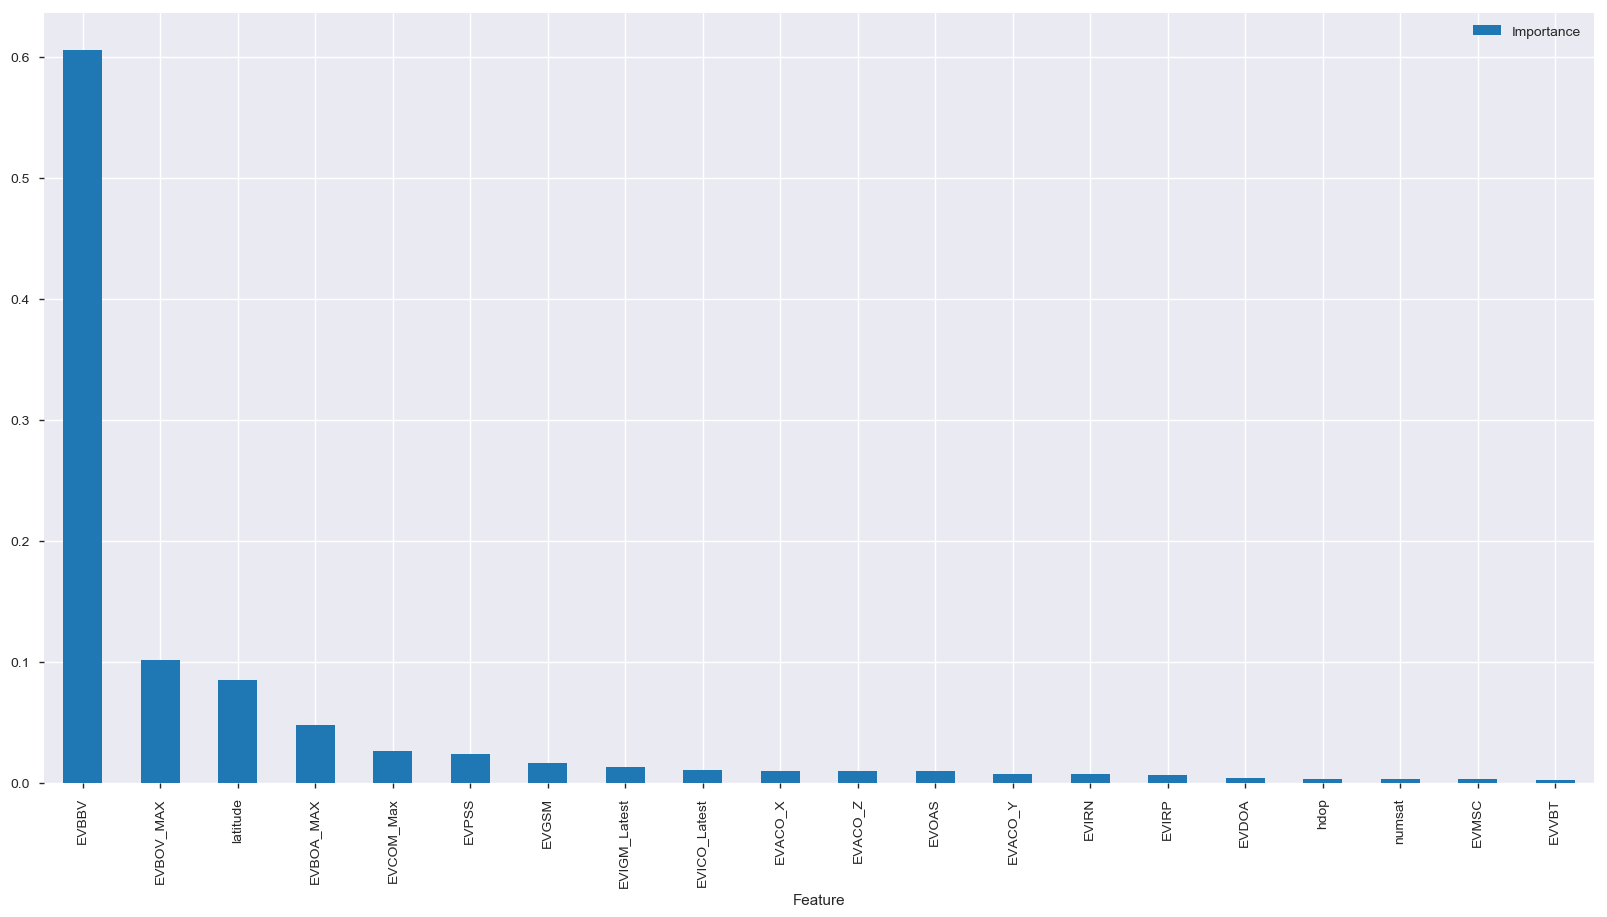

In [44]:
# Plotting Feature Importance Graph

features = pd.DataFrame()
features['Feature'] = x_train.columns
features['Importance'] = regressor.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)
features=features.head(20)
features.plot(kind='bar', figsize=(20, 10))

### Graph represent Top 20 Highly imp variable W.r.t  Target Variable

### Plotting relationship b/t Battery and Distance column. 

In [47]:
layout = go.Layout(title = 'Relationship Between Battery and distance',
                   yaxis = dict(title = 'Battery'),
                   xaxis = dict(title = 'Distance'))
trace = go.Scatter(x = new_data.Target_distance,
                  y = new_data_EV.EVSMA_MAX,
                  mode = 'markers',
                  name = 'Relationship Between Battery and distance',
                  line = dict(shape = 'spline'))
fig = go.Figure(data = [trace], layout=layout)

py.offline.iplot(fig)


### Battery is decreasing as the distance increases.
#####     31 Times Battery has been dropped in the whole run.


In [48]:
features_importance.Variables.head(20)

Top_20_imp_var=['EVBBV','EVBOV_MAX','latitude','EVBOA_MAX','EVCOM_Max','EVPSS','EVGSM','EVIGM_Latest','EVICO_Latest','EVACO_X',
                                    'EVACO_Z','EVOAS','EVACO_Y','EVIRN','EVIRP','EVDOA','hdop','numsat','EVMSC','EVVBT']

    

###  Relation of Top 20 imp feature W.r.t Target variable

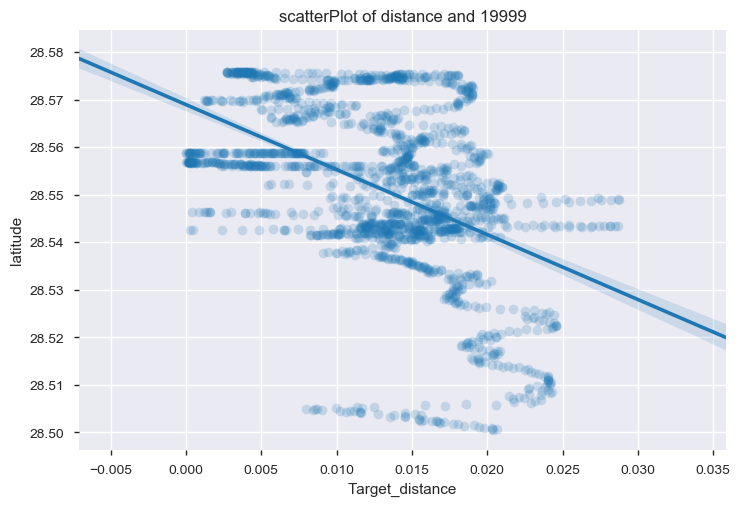

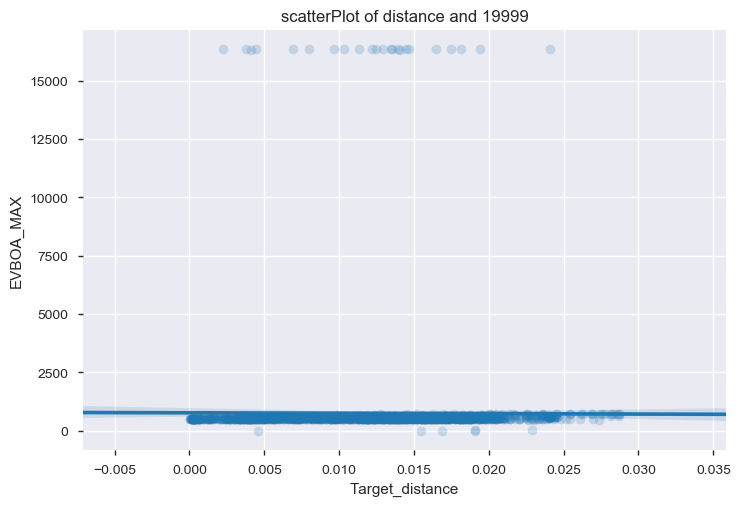

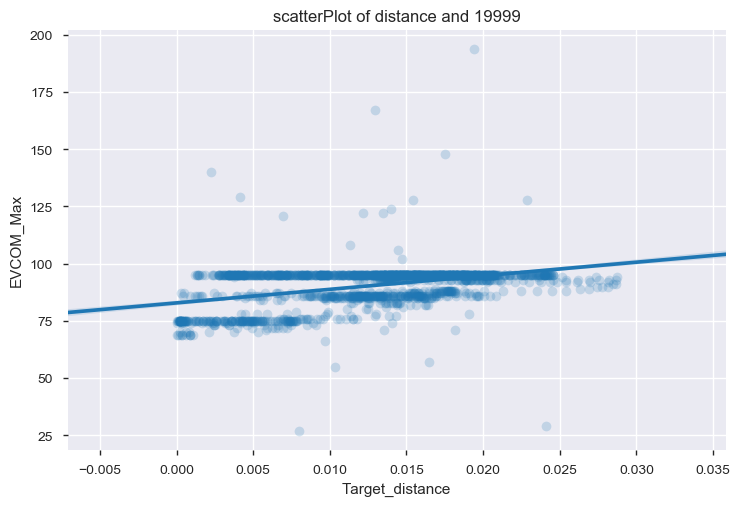

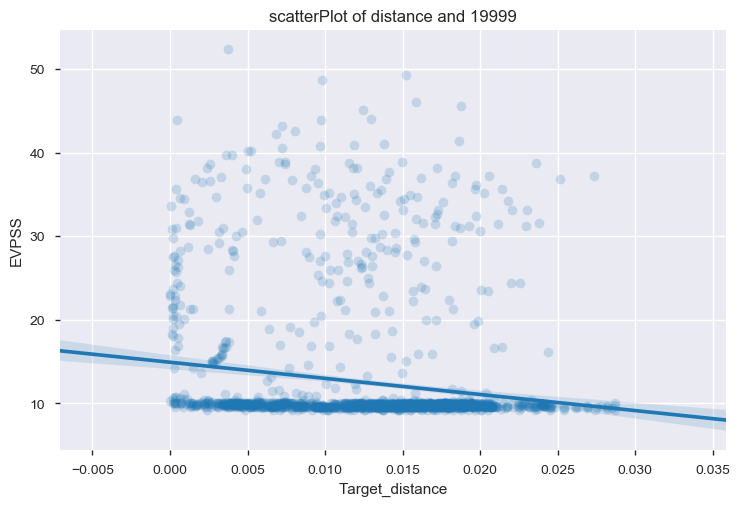

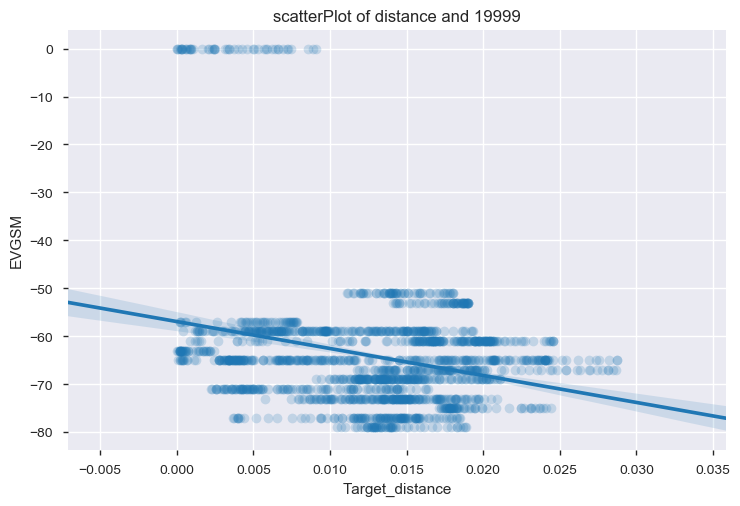

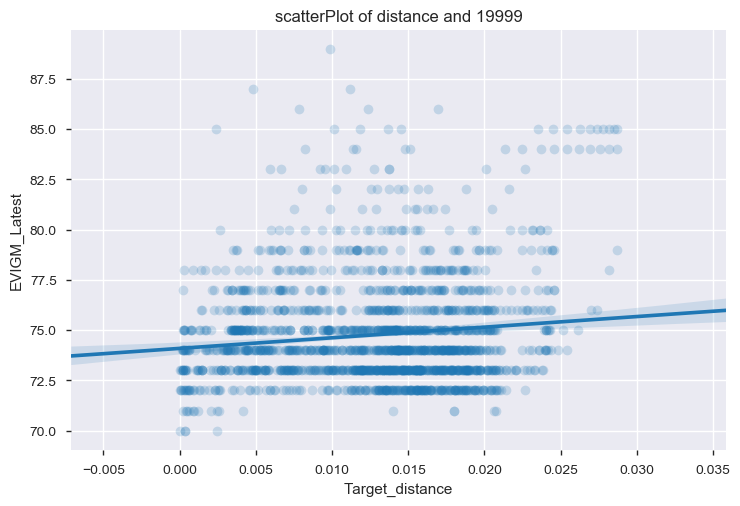

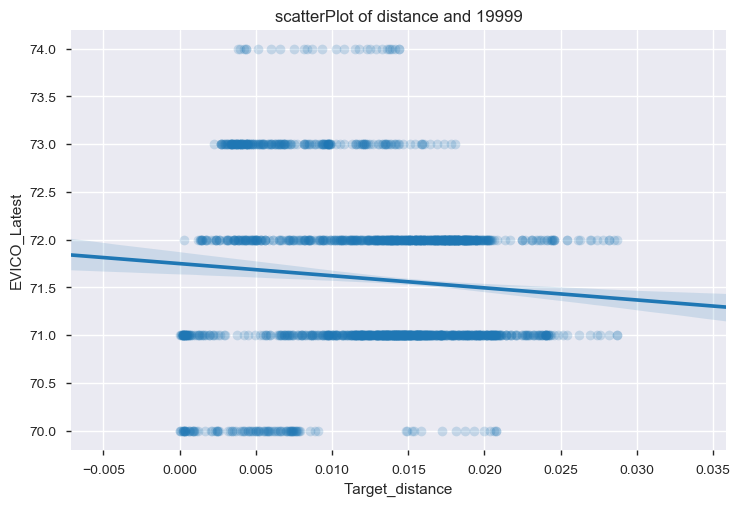

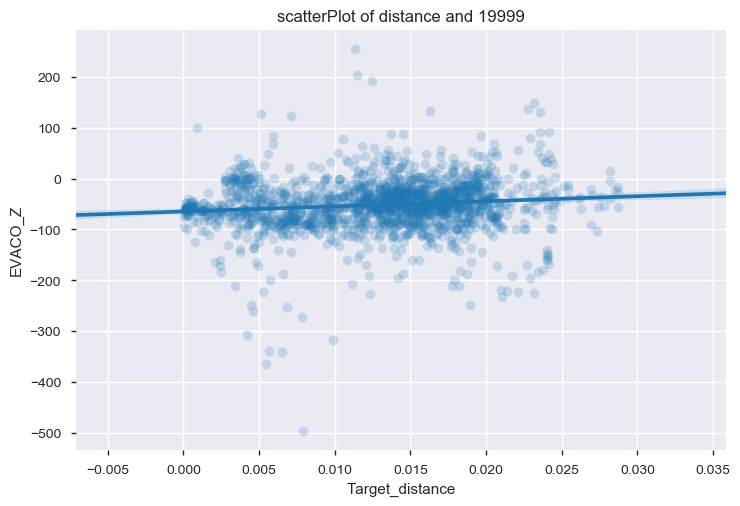

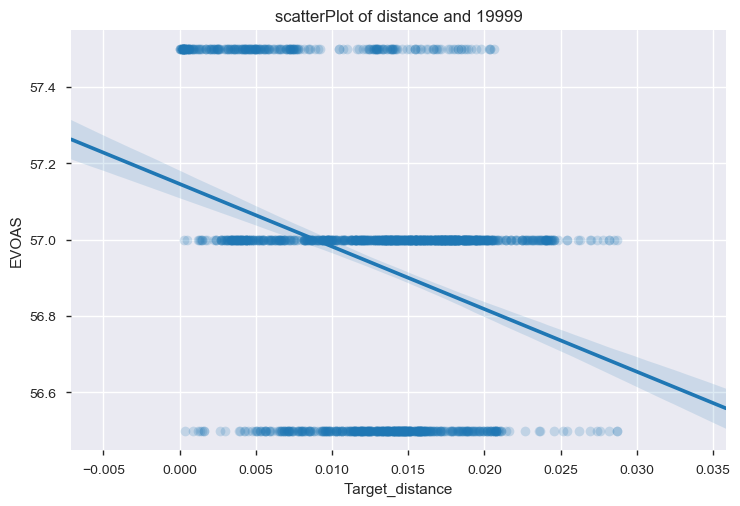

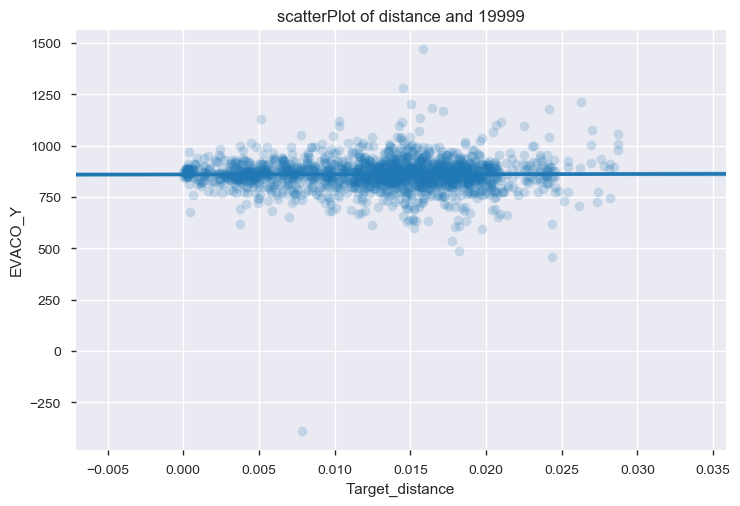

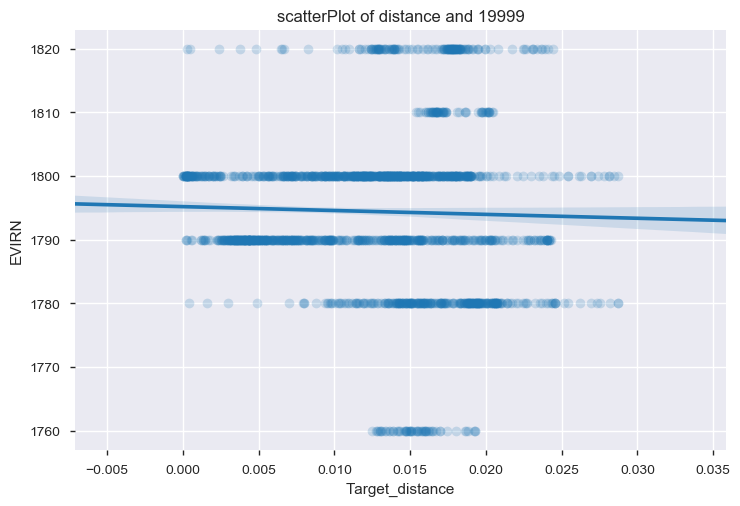

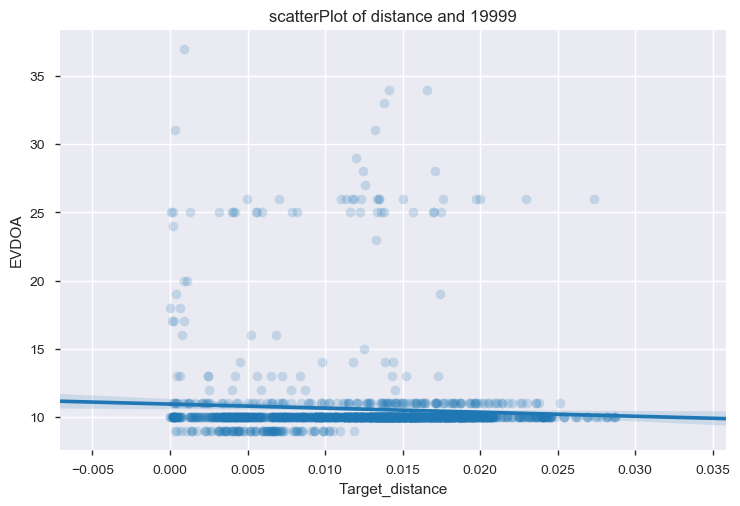

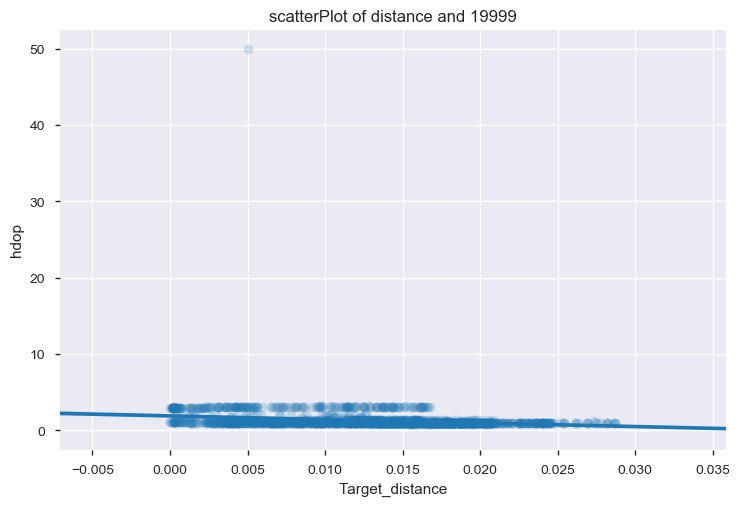

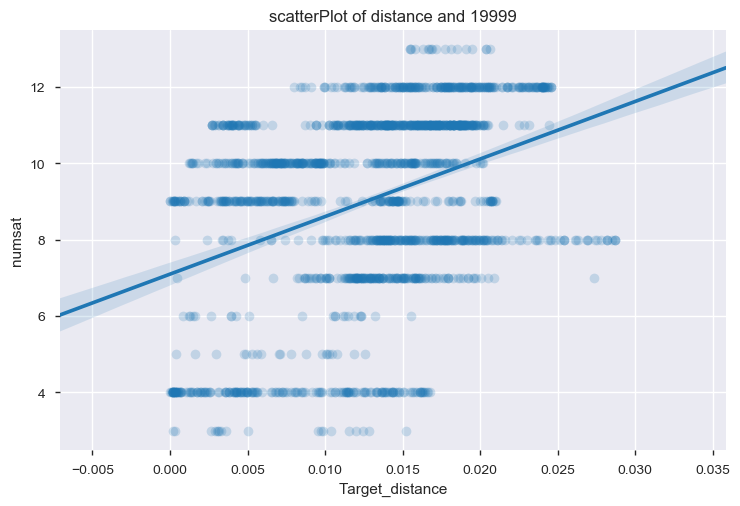

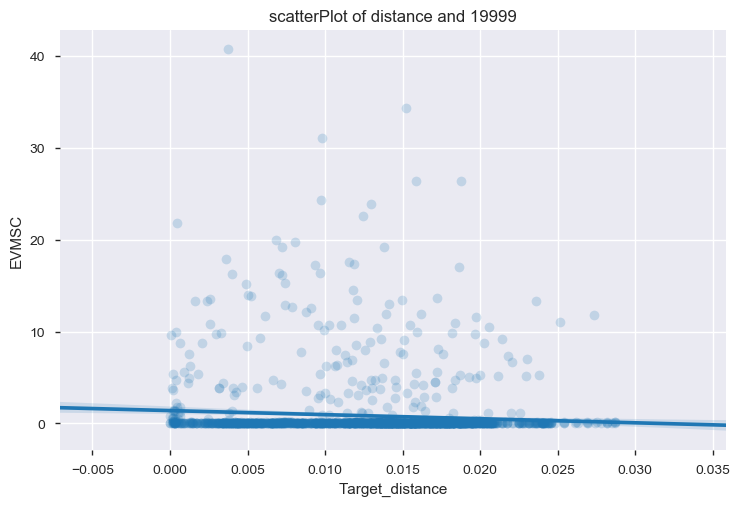

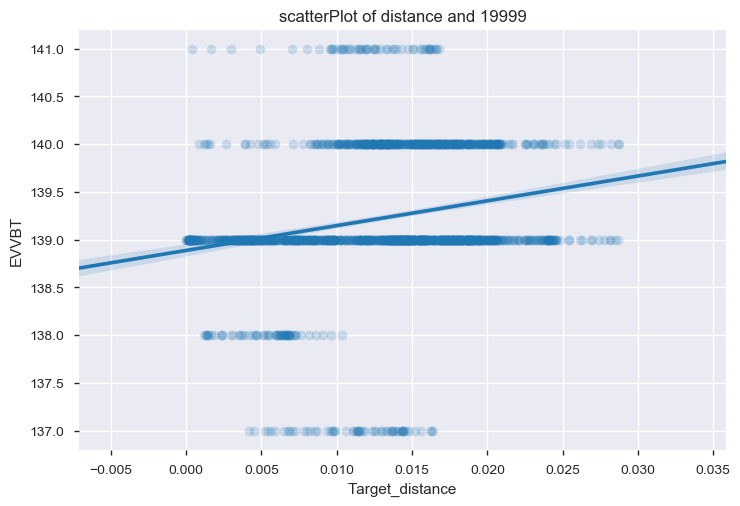

In [49]:
plt.rcParams["figure.figsize"]=(5,3)
plt.rcParams["axes.grid"]=True
plt.show()

for num_var in Top_20_imp_var:
    sns.lmplot(x='Target_distance',y=num_var,data=new_data,aspect=1.5,markers=["o"], scatter_kws={'alpha':0.2})
    plt.title(str("scatterPlot of distance and ") + str(i) )
 


# Model and Prediction

## 1) Linear Regression

In [50]:
Top_10_imp_var=['EVBBV','EVBOV_MAX','latitude','EVBOA_MAX','EVCOM_Max','EVPSS','EVGSM','EVIGM_Latest','EVICO_Latest','EVACO_X']
new_data[Top_10_imp_var].head()

EVBBV  EVBOV_MAX   latitude  EVBOA_MAX  EVCOM_Max   EVPSS  EVGSM  \
0   47.0     255.50  28.558857     513.75         69  35.650      0   
1   61.0     255.25  28.558857     517.75         69  10.600      0   
2   55.0     255.50  28.558857     517.75         69  34.575      0   
3   51.5     255.50  28.558857     514.00         69  23.125      0   
4   49.0     255.50  28.558857     514.50         69  30.800      0   

   EVIGM_Latest  EVICO_Latest  EVACO_X  
0            70            70     -408  
1            77            70     -600  
2            72            70     -536  
3            72            70     -584  
4            72            70     -540

In [51]:
train, test = train_test_split(new_data, test_size = 0.3, random_state = 42)
test.head()

latitude  EVBBV  EVGSM  numsat  EVIGM_Latest  EVICM  EVMSC  EVOAS  \
1368  28.558759   73.0    -67      11            76      8    0.0   57.0   
65    28.558857   66.5    -57       9            74      8    0.0   57.5   
700   28.546954   67.5    -69       8            75      8    0.1   56.5   
938   28.568440   67.5    -65      10            76      8    0.0   56.5   
1621  28.530818   73.0    -75      12            73      8    0.0   57.0   

      EVACO_Y  EVACO_Z       ...         EVIRT_Max  EVDOV   EVPSS  EVDOA  \
1368      896      -40       ...               120   13.9   9.750     10   
65        928      -84       ...               120   13.9  10.225     10   
700       764      -40       ...               120   13.9   9.675     10   
938       880        0       ...               120   13.9   9.700     10   
1621      823      -40       ...               120   13.9  10.025     10   

      EVBOV_MAX  EVCOM_Max  hdop  EVVBT  EVGPO  Target_distance  
1368     244.00         95   0.9    139     11         0.019936  
65       254.00         75   1.1    139     11         0.006077  
700      247.00         93   1.0    139     11         0.020194  
938      248.50         95   0.9    139     11         0.009587  
1621     245.75         95   0.9    140     11         0.017916  

[5 rows x 28 columns]

In [52]:
train.shape,test.shape
Top_10_imp_var=np.array(features_importance.Variables.head(10))
Top_10_imp_var

array(['EVBBV', 'EVBOV_MAX', 'latitude', 'EVBOA_MAX', 'EVCOM_Max',
       'EVPSS', 'EVGSM', 'EVIGM_Latest', 'EVICO_Latest', 'EVACO_X'],
      dtype=object)

In [53]:
var1='+'.join(Top_10_imp_var)
Formula='Target_distance~'+var1
Formula
# var1 contains independent variable and Target variable is the dependent variable 
# so we are creating the linear eq by formula ('Target_distance~'+var1)

'Target_distance~EVBBV+EVBOV_MAX+latitude+EVBOA_MAX+EVCOM_Max+EVPSS+EVGSM+EVIGM_Latest+EVICO_Latest+EVACO_X'

In [54]:
import statsmodels.formula.api as smf
LR_model=smf.ols(Formula,train).fit()
print(LR_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Target_distance   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     338.6
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        10:01:30   Log-Likelihood:                 5468.4
No. Observations:                1264   AIC:                        -1.091e+04
Df Residuals:                    1253   BIC:                        -1.086e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1512      0.178     12.108   

MAE: 0.002425564141704232
MSE: 9.708915852194938e-06
RMSE: 0.0031159133255267125


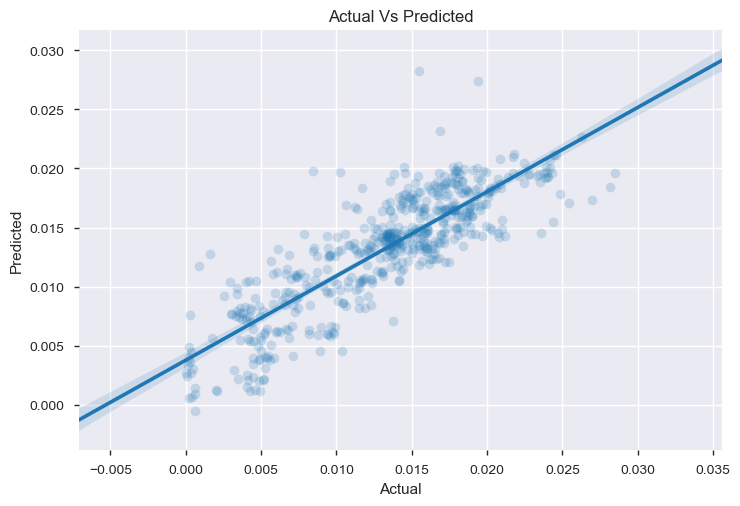

In [56]:
### Prediction for test dataset using same variable:-

lm_model1 = smf.ols(Formula, test).fit()
test_pred = pd.DataFrame({'Actual':test.Target_distance, 'Predicted':lm_model1.predict()})

print ('MAE:', metrics.mean_absolute_error(test_pred.Actual, test_pred.Predicted))
print ('MSE:', metrics.mean_squared_error(test_pred.Actual, test_pred.Predicted))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_pred.Actual, test_pred.Predicted)))

sns.lmplot(x='Actual', y='Predicted', data=test_pred, aspect=1.5, scatter_kws={'alpha':0.2})
plt.title('Actual Vs Predicted')
plt.show()

#### Here we got the RMSE of 0.0031 which is good enough to use this Model in future.

# 2) Random Forest Model

In [57]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(random_state=0)
regressor.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [58]:
y_pred=regressor.predict(x_test)

In [59]:
train_pred = pd.DataFrame({'Actual':y_train, 'Predicted':regressor.predict(x_train)})
test_pred = pd.DataFrame({'Actual':y_test, 'Predicted':regressor.predict(x_test)})

print('train_accuracy:',metrics.r2_score(train_pred.Actual, train_pred.Predicted))
print('test_accuracy:',metrics.r2_score(test_pred.Actual, test_pred.Predicted))

print('################################################')
# Some other metrices:-

from sklearn import metrics
print ('MAE:', metrics.mean_absolute_error(test_pred.Actual, test_pred.Predicted))
print ('MSE:', metrics.mean_squared_error(test_pred.Actual, test_pred.Predicted))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_pred.Actual, test_pred.Predicted)))

train_accuracy: 0.9862734238086723
test_accuracy: 0.9248719266574325
################################################
MAE: 0.0010611826691003384
MSE: 2.537245757265863e-06
RMSE: 0.001592873427886178


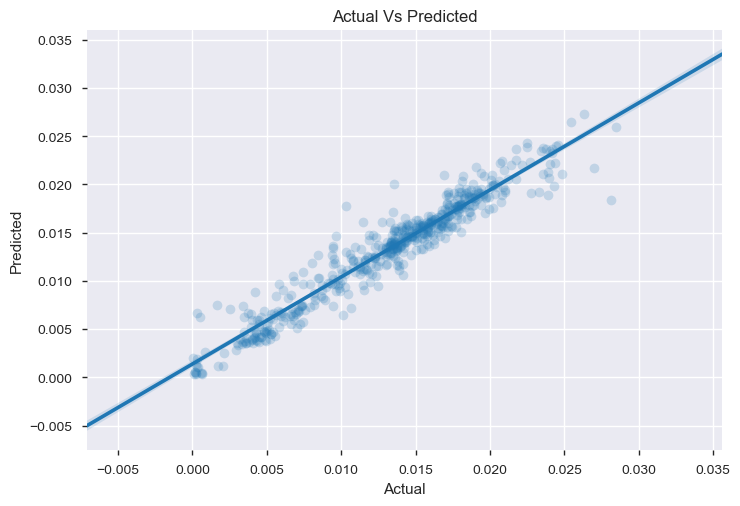

In [60]:
sns.lmplot(x='Actual', y='Predicted', data=test_pred, aspect=1.5, scatter_kws={'alpha':0.2})
plt.title('Actual Vs Predicted')
plt.show()

### Random Forest giving 92% accuracy in test data.